## Predictive Analysis of Human Activities

In [8]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set working directory
%cd /content/drive/MyDrive/Colab Notebooks/Project/

/content/drive/MyDrive/Colab Notebooks/Project


# *1. DATA PREPROCESSING*

In [5]:
# importting libraries

import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### **Converting data fom .txt to CSV and Parqute format and concatenating all files from different folders. **

In [ ]:
# Converting all .txt to concatinatted .csv file
import os
import pandas as pd

# Concatenating 19 dataframes
def read_and_concat_data(activity_dir):
    data = []
    for i in range(1, 9):
        participant_data = []
        directory = os.path.join(activity_dir, f"p{i}")
        filelist = os.listdir(directory)
        for file in filelist:
            filepath = os.path.join(directory, file)
            df = pd.read_csv(filepath, sep=",", header=None)
            participant_data.append(df)
        activity_data = pd.concat(participant_data)
        data.append(activity_data)
    return data

# creating dataset for all 8 activities
def preprocess_data(data, activity):
    for idx, df in enumerate(data):
        df.columns = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro","T_xmag", "T_ymag", "T_zmag",
                     "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
                     "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
                     "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
                     "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]
        df.insert(45, 'Subject', idx+1)
        df.insert(46, 'Activity', activity)

# Combining data for all activities
activities_data = []
for i in range(1, 20):  # Adjusted for 19 activities
    activity_dir = f'/Users/omkarvilasnarkar/Downloads/MS DAE/Data Mining 7275/A Project/data_txt/a{i:02d}'
    activity_data = read_and_concat_data(activity_dir)
    preprocess_data(activity_data, i)  # Adjusted the preprocessing step here
    activities_data.extend(activity_data)

dataset = pd.concat(activities_data, ignore_index=True)
dataset.head()


,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Subject,Activity
0,8.0411,1.1530,5.5141,-0.024100,-0.002951,0.007333,-0.78981,-0.072298,0.14805,0.61037,...,-9.0633,2.6393,-0.004407,-0.000894,-0.000569,0.74138,0.30115,-0.056264,1,1
1,8.1009,1.1382,5.3951,-0.002307,-0.005099,-0.007220,-0.78982,-0.071518,0.14791,0.62262,...,-9.0633,2.6615,-0.008110,-0.005275,0.004845,0.74128,0.30287,-0.057228,1,1
2,8.0859,1.1159,5.4321,0.001318,0.000328,-0.001767,-0.79104,-0.072855,0.15002,0.59345,...,-9.0635,2.6326,-0.014279,0.007983,-0.002314,0.74225,0.30325,-0.054814,1,1
3,8.0710,1.1382,5.4545,0.001293,-0.006885,-0.005384,-0.79078,-0.070271,0.15001,0.57373,...,-9.0935,2.6328,-0.018723,0.006059,-0.007749,0.74230,0.30325,-0.054149,1,1
4,8.0708,1.1231,5.5141,-0.021358,0.000598,0.005500,-0.79211,-0.072200,0.15011,0.54932,...,-9.0935,2.6180,0.007612,0.009518,-0.018648,0.73976,0.30298,-0.056217,1,1


In [ ]:
# Converting the concatenated dataframe to the .csv file
dataset.to_csv('dataset.csv', index=False)


In [ ]:
# Converting the .csv file to .parquet Azure
df.to_parquet('dataset.parquet')

In [10]:
# Loading a data
df = pd.read_parquet('dataset.parquet')
df1 = pl.read_parquet('dataset.parquet')


In [6]:
# Number of rows and Columns in the dataset

print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Rows: {df1.shape[1]}')


Number of Rows: 1140000
Number of Rows: 47


In [7]:
# Columns of the dataset

df1.columns

['T_xacc',
 'T_yacc',
 'T_zacc',
 'T_xgyro',
 'T_ygyro',
 'T_zgyro',
 'T_xmag',
 'T_ymag',
 'T_zmag',
 'RA_xacc',
 'RA_yacc',
 'RA_zacc',
 'RA_xgyro',
 'RA_ygyro',
 'RA_zgyro',
 'RA_xmag',
 'RA_ymag',
 'RA_zmag',
 'LA_xacc',
 'LA_yacc',
 'LA_zacc',
 'LA_xgyro',
 'LA_ygyro',
 'LA_zgyro',
 'LA_xmag',
 'LA_ymag',
 'LA_zmag',
 'RL_xacc',
 'RL_yacc',
 'RL_zacc',
 'RL_xgyro',
 'RL_ygyro',
 'RL_zgyro',
 'RL_xmag',
 'RL_ymag',
 'RL_zmag',
 'LL_xacc',
 'LL_yacc',
 'LL_zacc',
 'LL_xgyro',
 'LL_ygyro',
 'LL_zgyro',
 'LL_xmag',
 'LL_ymag',
 'LL_zmag',
 'Subject',
 'Activity']

In [8]:
# Is there any Null values?

null_values = df.isnull().any().sum()

if null_values == 0:
  print(f'There are NO null values in the dataset.')
else :
  print(f'Null values in the dataset are:\n {null_values[null_values != 0]}')

There are NO null values in the dataset.


In [9]:
# description of the data

df1.describe()

describe,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,RA_yacc,RA_zacc,RA_xgyro,RA_ygyro,RA_zgyro,RA_xmag,RA_ymag,RA_zmag,LA_xacc,LA_yacc,LA_zacc,LA_xgyro,LA_ygyro,LA_zgyro,LA_xmag,LA_ymag,LA_zmag,RL_xacc,RL_yacc,RL_zacc,RL_xgyro,RL_ygyro,RL_zgyro,RL_xmag,RL_ymag,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Subject,Activity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6,1.14e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",7.765766,-0.811036,2.768845,-0.002796,0.013695,-0.003312,-0.598436,0.061729,-0.272517,4.260595,4.938779,3.119262,0.016302,-0.021484,-0.00318,-0.21123,-0.325662,-0.261232,4.278995,-3.910636,3.822165,-0.018219,-0.02286,0.002567,-0.278319,0.323282,-0.343635,-7.37939,2.718987,-1.519534,0.020852,0.030531,-0.004077,0.428239,-0.27012,0.068801,-7.324489,-3.217916,-0.530367,-0.015639,0.027864,-0.002454,0.458107,0.295544,0.064504,4.5,10.0
"""std""",5.637887,2.623027,3.53826,0.794011,0.69104,0.310766,0.3561,0.340436,0.373412,5.821339,4.580221,3.869474,0.869443,0.764749,1.023147,0.46358,0.383043,0.437554,6.023945,4.436411,4.399695,0.939681,0.811552,0.982344,0.468395,0.438048,0.448177,5.880206,5.996961,3.123667,0.857812,0.494064,1.142972,0.364413,0.383219,0.361637,5.81076,5.925556,3.39262,0.868292,0.483526,1.158953,0.38024,0.383894,0.357384,2.291289,5.477228
"""min""",-99.715,-49.941,-62.664,-27.851,-23.598,-12.067,-1.4226,-1.0228,-1.0806,-49.535,-53.915,-62.145,-26.663,-15.439,-11.35,-1.6513,-2.1623,-3.4597,-55.755,-61.926,-64.506,-28.457,-19.319,-18.976,-2.638,-1.5669,-3.7563,-116.08,-83.783,-58.324,-16.941,-7.3695,-7.2667,-0.85624,-1.0914,-0.98758,-118.03,-119.81,-43.382,-12.085,-6.9258,-6.783,-0.84434,-0.90176,-1.126,1.0,1.0
"""25%""",6.907,-1.5095,0.89985,-0.16289,-0.10248,-0.09748,-0.8247,-0.17883,-0.60172,0.094976,2.5398,0.81226,-0.1356,-0.16637,-0.2033,-0.54955,-0.62187,-0.61313,0.11464,-6.0204,1.6434,-0.14949,-0.16844,-0.17449,-0.58605,-0.011234,-0.68011,-9.8659,-0.4226,-2.5282,-0.19736,-0.10788,-0.57191,0.30163,-0.57405,-0.21507,-9.813,-7.9644,-2.2122,-0.31454,-0.12359,-0.36188,0.29211,0.019285,-0.17119,3.0,5.0
"""50%""",8.8303,-0.38953,2.7037,0.000461,0.017438,-0.002664,-0.68975,0.0225,-0.30926,4.143,4.5996,2.6645,0.007994,-0.00421,-0.001273,-0.33126,-0.32874,-0.24654,4.5813,-3.4147,3.4929,-0.001402,-0.002315,-0.006011,-0.38693,0.37977,-0.45077,-8.8272,1.6493,-1.1554,0.001289,0.008623,-0.007716,0.50646,-0.30765,0.061833,-8.5767,-2.2862,-0.78136,-0.004348,0.000431,-0.000681,0.50837,0.35135,0.081644,5.0,10.0
"""75%""",9.6905,0.41362,4.4052,0.16482,0.13131,0.088826,-0.49252,0.28235,0.040582,8.505,7.491,5.8893,0.16181,0.14566,0.18436,0.1036,-0.061891,0.058668,8.7535,-1.6814,7.0809,0.13987,0.15171,0.16956,0.063799,0.62209,-0.004296,-3.3093,7.5933,0.0,0.30937,0.14818,0.34735,0.66861,0.001102,0.33546,-2.6851,0.10801,0.39765,0.19732,0.14233,0.57253,0.69017,0.58489,0.29822,6.0,15.0
"""max""",93.694,41.013,120.53,27.671,14.379,19.262,1.0215,1.0309,0.96339,71.652,65.427,56.384,26.134,9.9733,16.734,2.0433,2.4516,1.0892,71.016,62.015,62.702,22.676,12.257,13.465,1.2153,3.0152,4.0403,26.523,99.969,75.776,11.537,12.15,9.214,1.289,0.91756,1.1182,17.362,78.947,60.968,19.158,8.9184,7.109,1.3741,1.2466,1.0426,8.0,19.0


In [10]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140000 entries, 0 to 1139999
Data columns (total 47 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   T_xacc    1140000 non-null  float64
 1   T_yacc    1140000 non-null  float64
 2   T_zacc    1140000 non-null  float64
 3   T_xgyro   1140000 non-null  float64
 4   T_ygyro   1140000 non-null  float64
 5   T_zgyro   1140000 non-null  float64
 6   T_xmag    1140000 non-null  float64
 7   T_ymag    1140000 non-null  float64
 8   T_zmag    1140000 non-null  float64
 9   RA_xacc   1140000 non-null  float64
 10  RA_yacc   1140000 non-null  float64
 11  RA_zacc   1140000 non-null  float64
 12  RA_xgyro  1140000 non-null  float64
 13  RA_ygyro  1140000 non-null  float64
 14  RA_zgyro  1140000 non-null  float64
 15  RA_xmag   1140000 non-null  float64
 16  RA_ymag   1140000 non-null  float64
 17  RA_zmag   1140000 non-null  float64
 18  LA_xacc   1140000 non-null  float64
 19  LA_yacc   1140000 non

In [11]:
# corelation between accelerometer vs. gyroscope

correlation_matrix = df1[df1.columns].corr()


# *2.1 Exploratory Data Analysis (EDA)*

Feature Correlation Heatmaps:

Visualize these correlations using heatmaps to identify which sensor measurements are highly correlated.

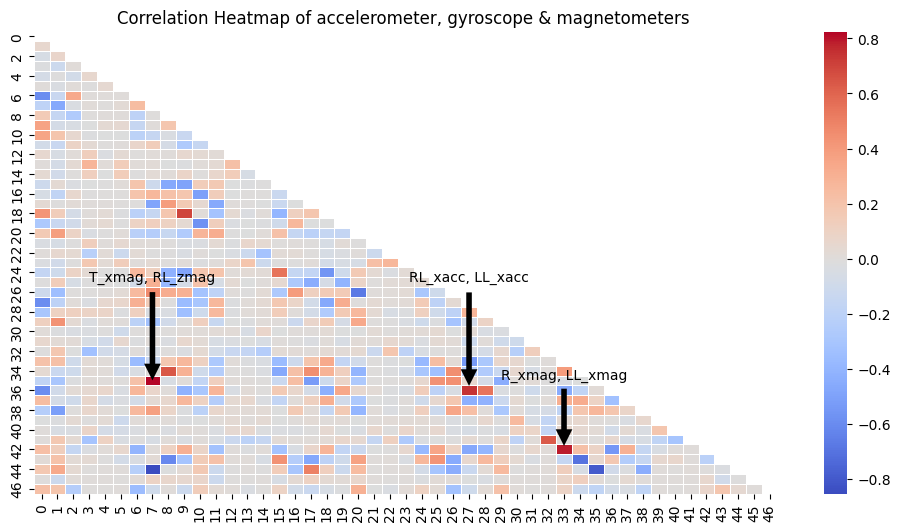

In [ ]:
# ploting heatmap

plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths= 0.5, mask=mask)
plt.title('Correlation Heatmap of accelerometer, gyroscope & magnetometers ')

plt.annotate(f'T_xmag, RL_zmag', xy=(7.5,36),xytext=(7.5,25),ha='center',va='center', arrowprops= dict(facecolor='black', shrink=0.05, linewidth=0.005))
plt.annotate(f'R_xmag, LL_xmag', xy=(33.5,42.5),xytext=(33.5,35),ha='center',va='center', arrowprops= dict(facecolor='black', shrink=0.05, linewidth=0.005))
plt.annotate(f'RL_xacc, LL_xacc', xy=(27.5,36.6),xytext=(27.5,25),ha='center',va='center', arrowprops= dict(facecolor='black', shrink=0.05, linewidth=0.005))


plt.show()

In [ ]:
# @title Default title text
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming X contains the relevant subset of features for visualization
X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)

# Instantiate StandardScaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a pandas DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Visualize pairplot using the scaled DataFrame
sns.pairplot(X_train_scaled_df)

# Show the plot
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-f7988ca52425>", line 18, in <cell line: 18>
    sns.pairplot(X_train_scaled_df)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py", line 2119, in pairplot
    grid = PairGrid(data, vars=vars, x_vars=x_vars, y_vars=y_vars, hue=hue,
  File "/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py", line 1282, in __init__
    axes = fig.subplots(len(y_vars), len(x_vars),
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/figure.py", line 906, in subplots
    axs = gs.subplots(sharex=sharex, sharey=sharey, squeeze=squeeze,
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/gridspec.py", line 299, in subplots
    axarr[row, col] = figure.add_subplot(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/figure.py", line 757, in add_s

TypeError: object of type 'NoneType' has no len()

Error in callback <function _draw_all_if_interactive at 0x7ab249a3d120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ab249a3c3a0> (for post_execute):


KeyboardInterrupt: 

Histograms

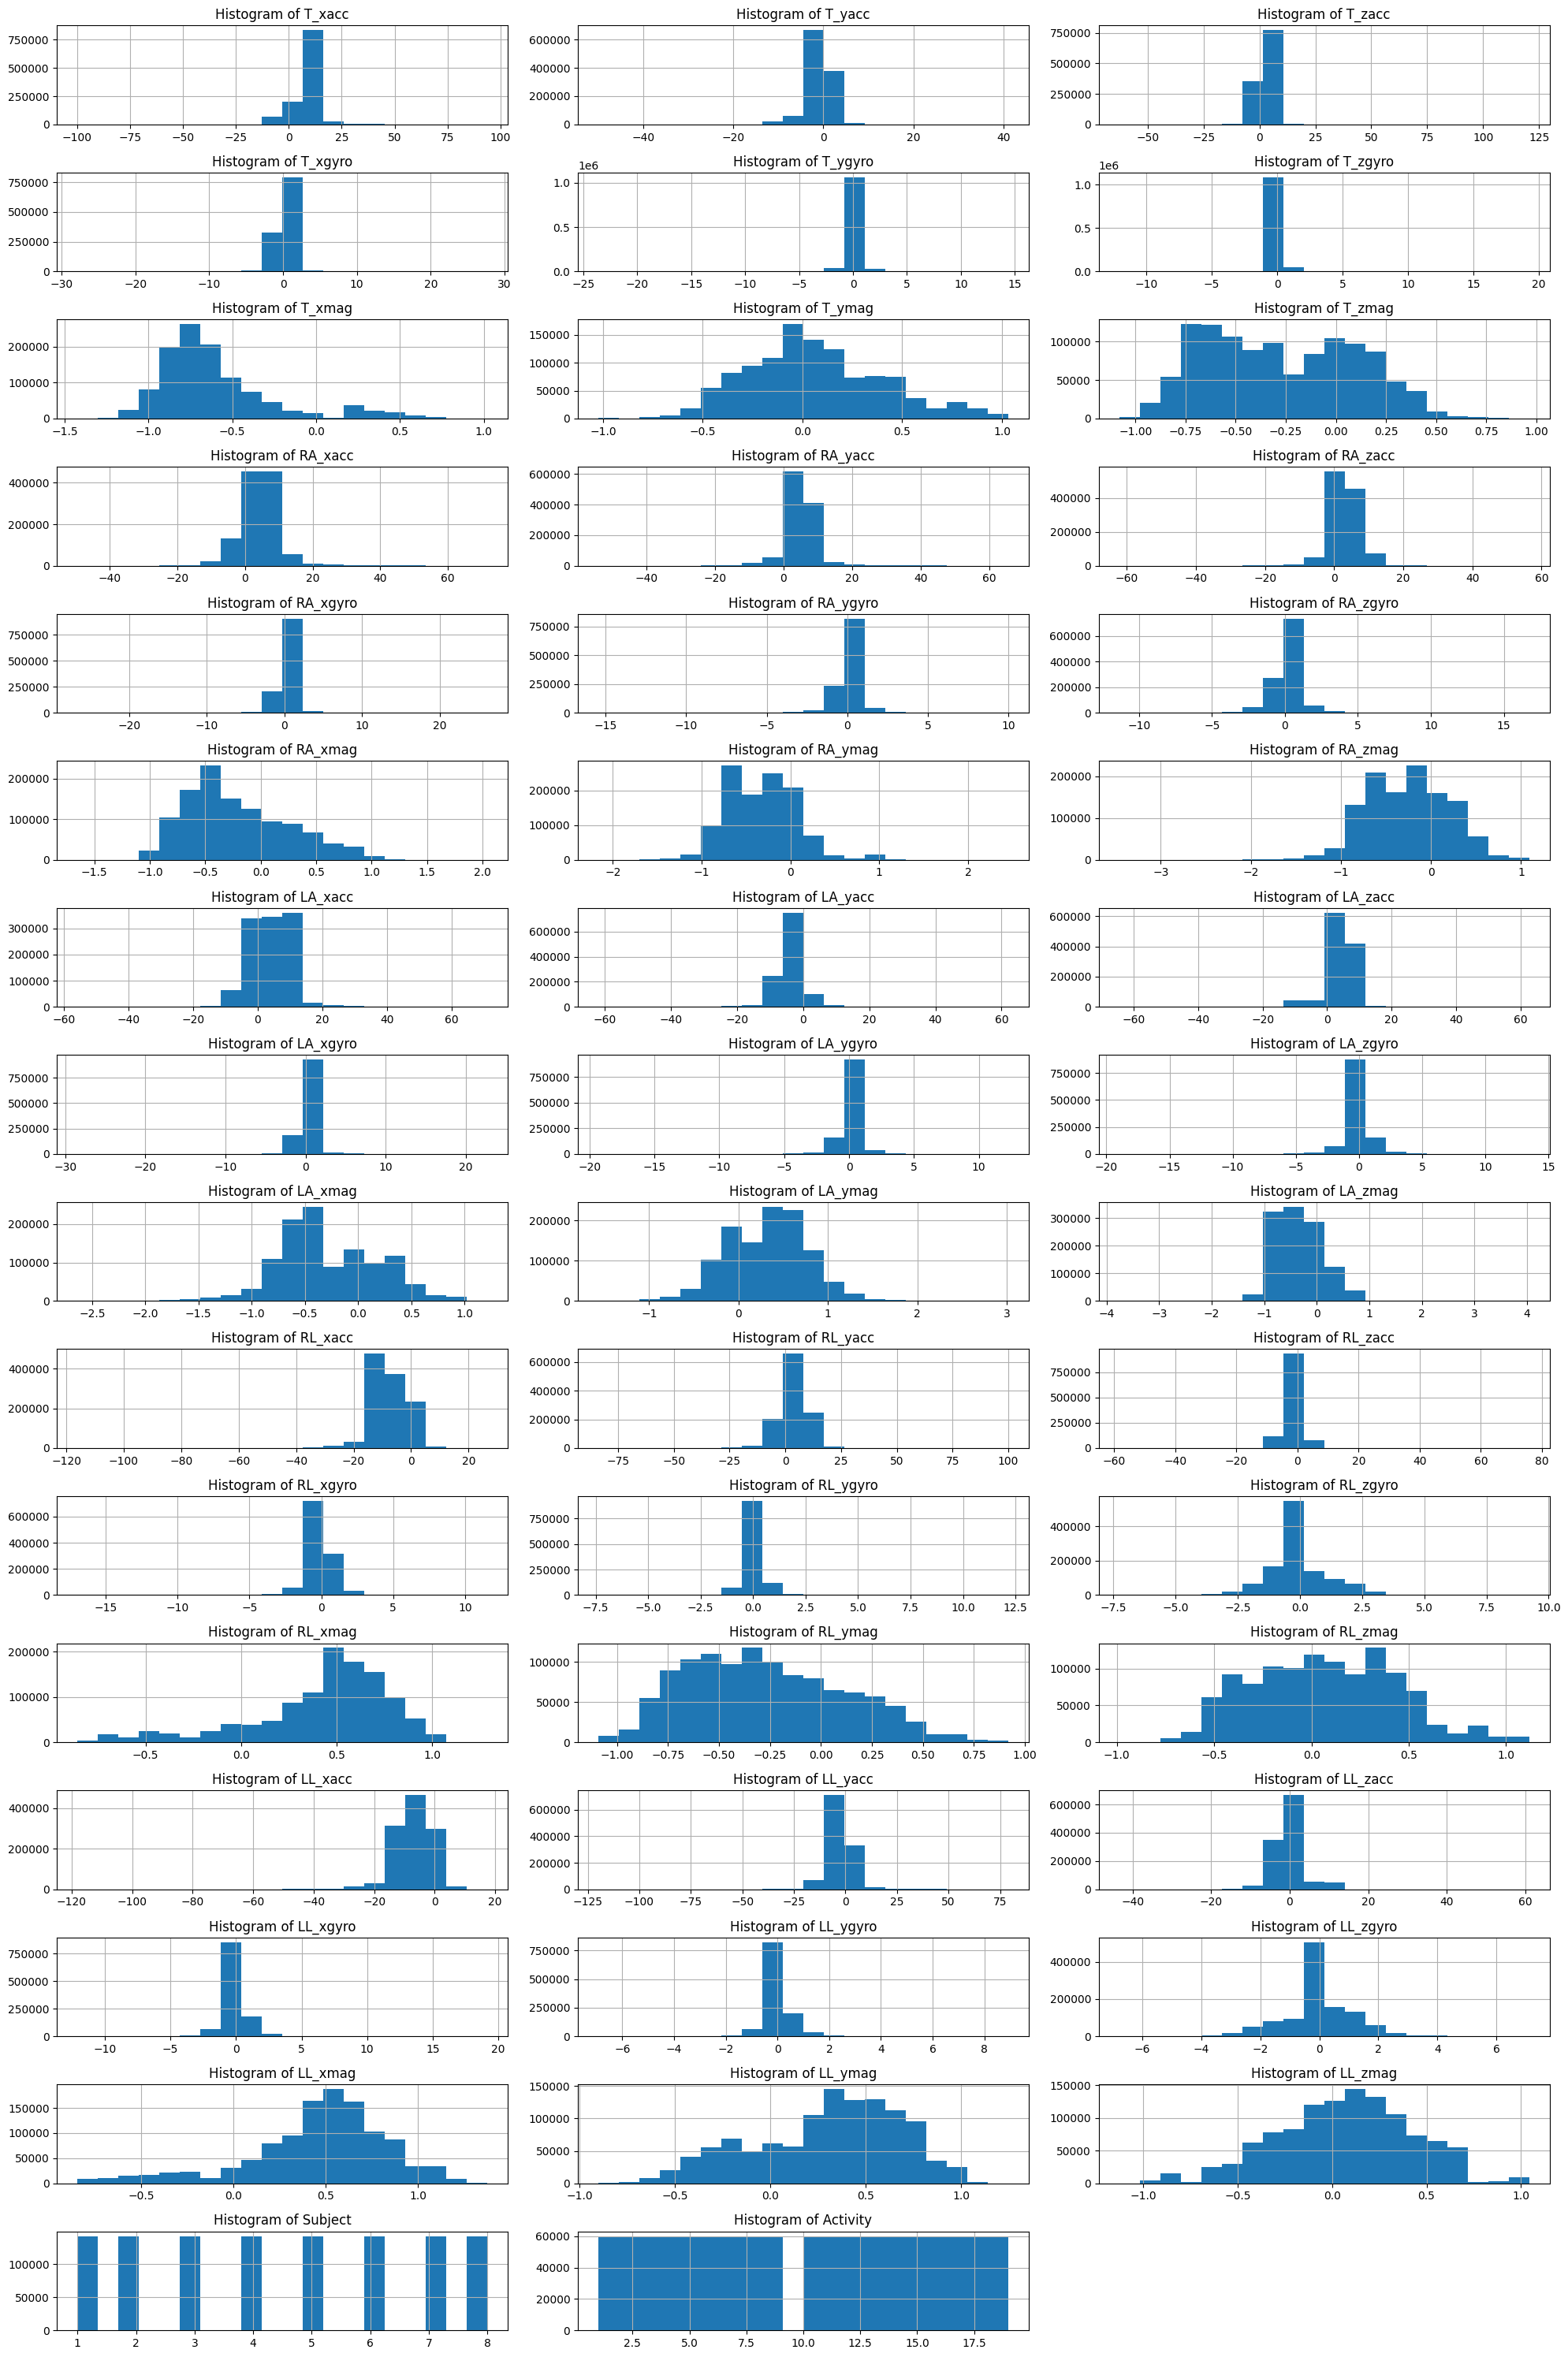

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing numeric data columns

# Calculate number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1  # Adjust number of columns per row here (e.g., 3)

# Create a figure with a specific size
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 30))  # Adjust figsize and number of columns as needed

# Flatten axes array to handle both single and multiple subplots
axes = axes.flatten()

# Iterate over each column and plot its histogram
for i, column in enumerate(df.columns):
    # Select the current axis for plotting
    ax = axes[i]

    # Plot histogram for the current column
    df[column].hist(ax=ax, bins=20)  # Adjust 'bins' for desired histogram granularity

    # Set title for the subplot (optional)
    ax.set_title(f'Histogram of {column}')

# Hide any extra subplots (if num_cols is not a multiple of 3)
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

# Adjust layout and spacing of subplots
plt.tight_layout()

# Display the histogram subplot
plt.show()


time seies

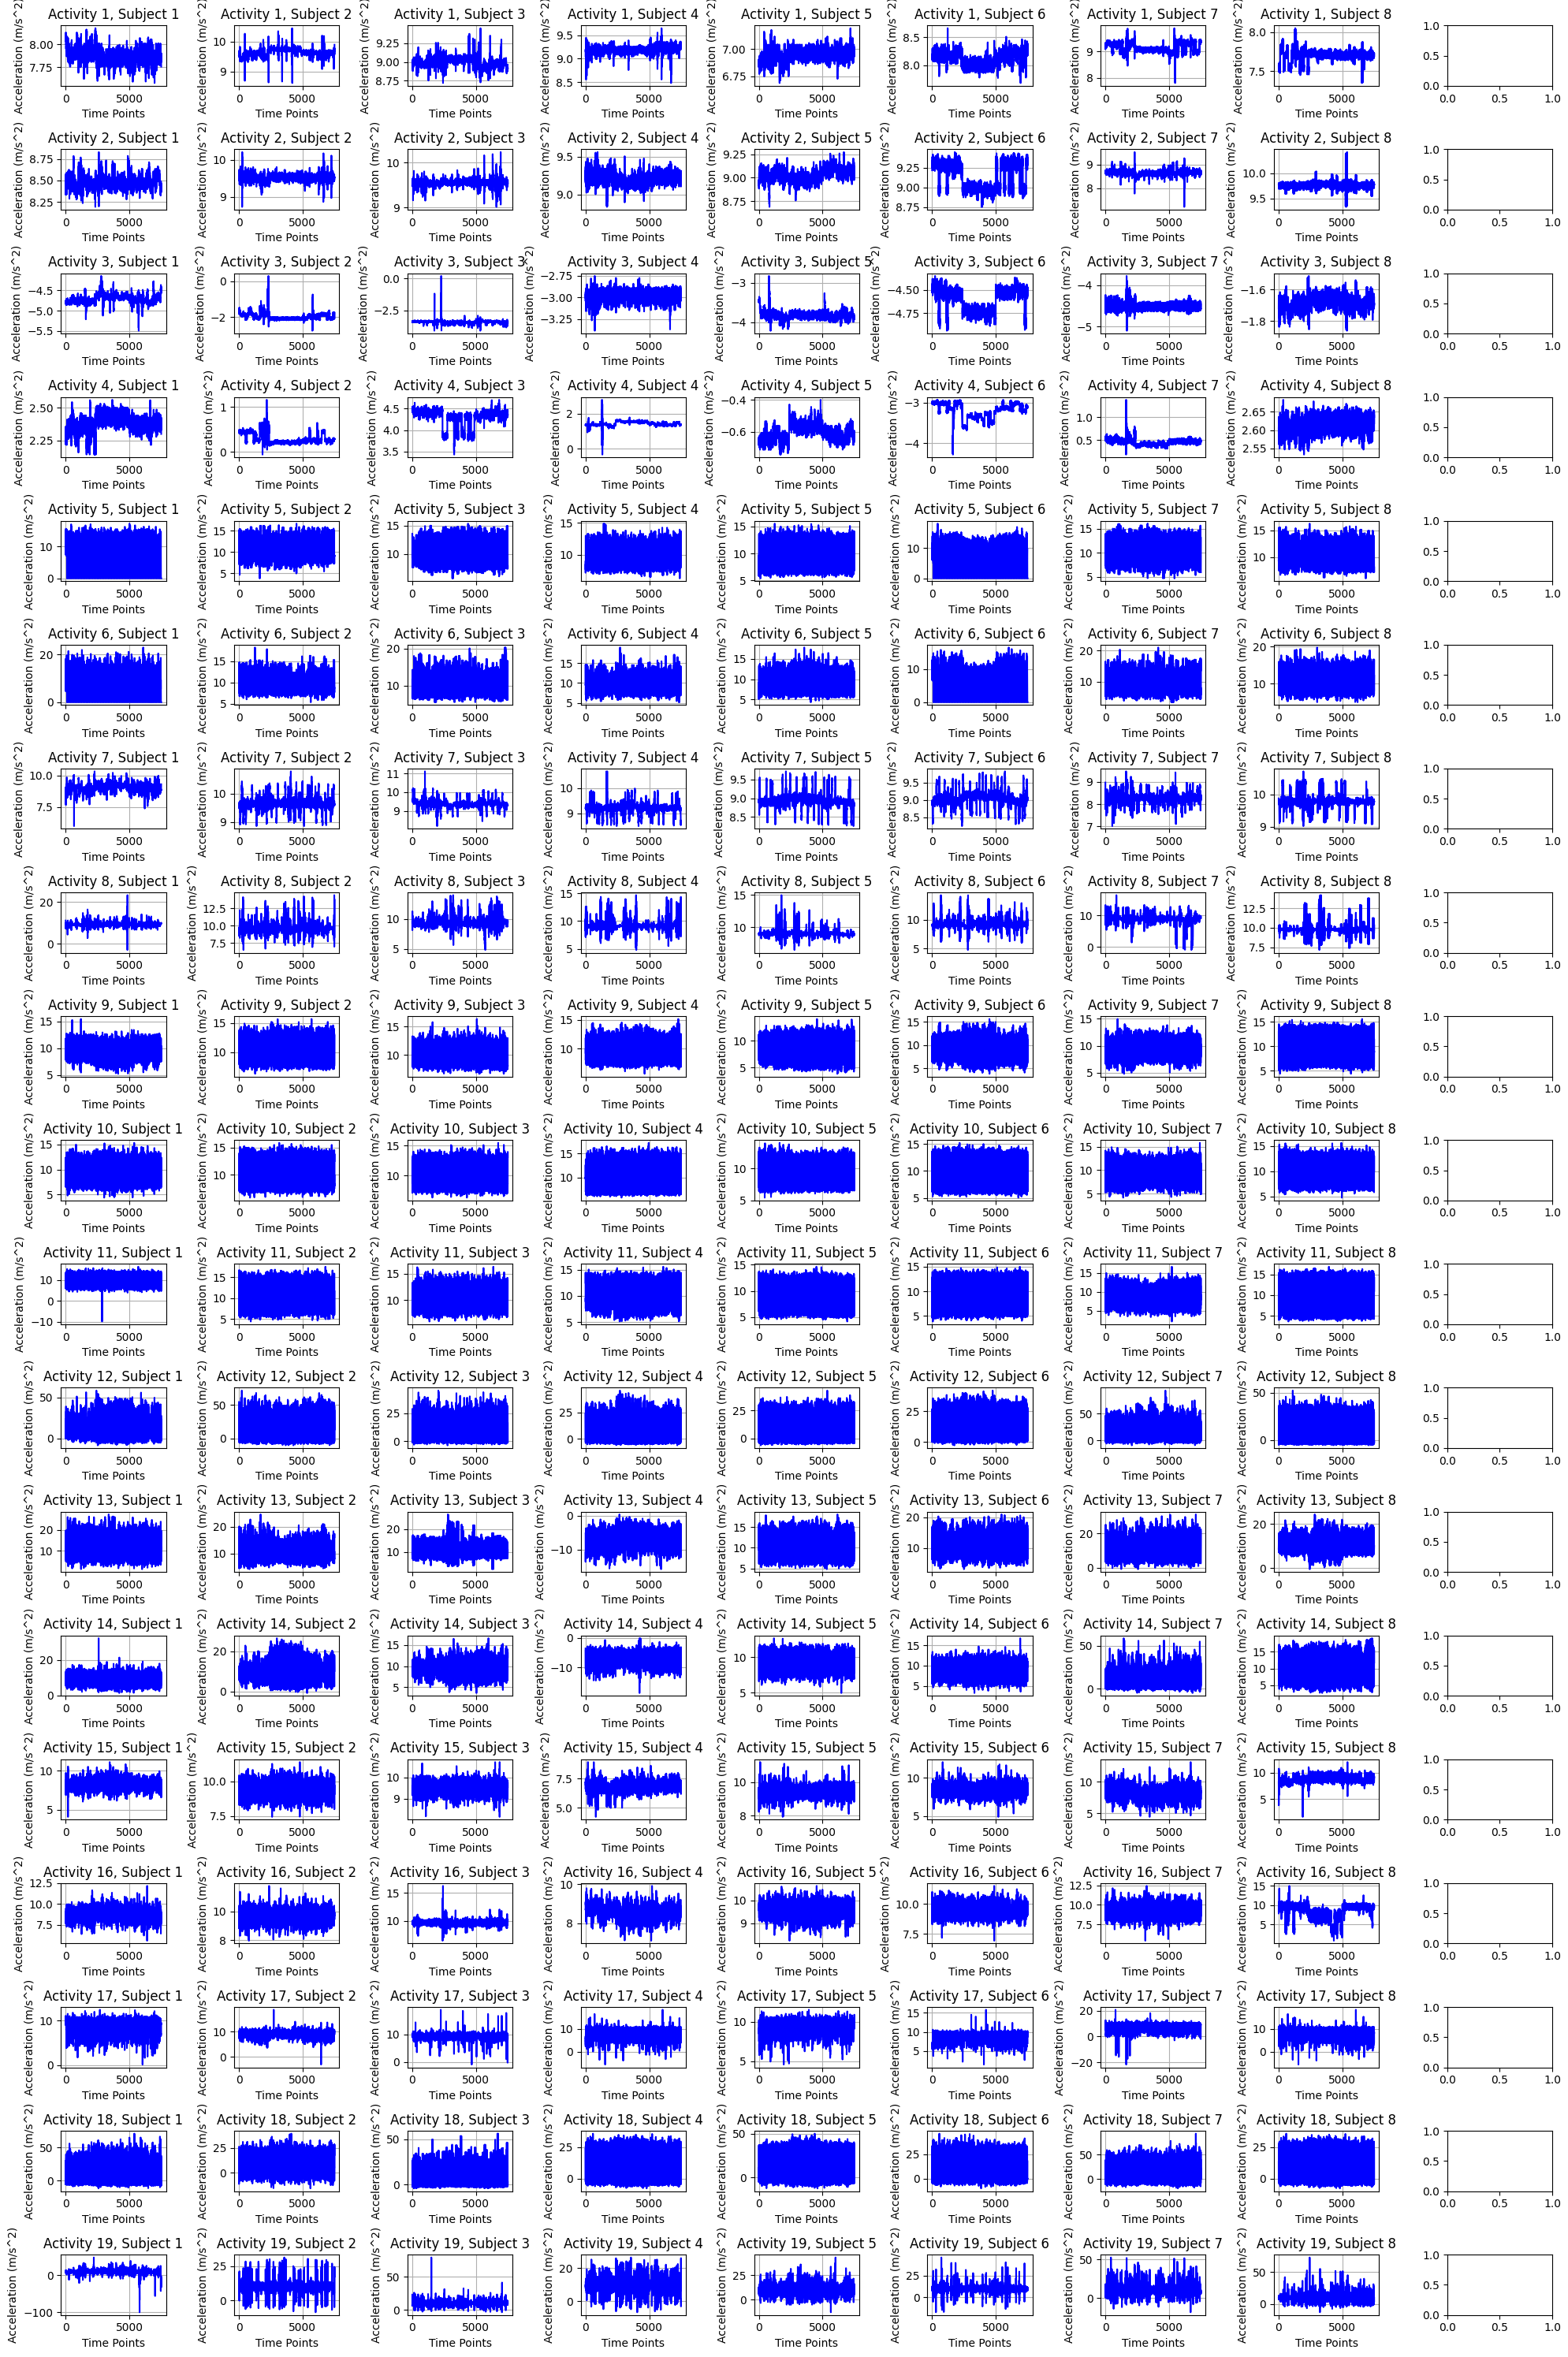

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the sensor data

# Define the sampling frequency
sampling_frequency = 25  # Hz

# Define the layout of plots (9 plots per row)
num_subjects = 8
num_activities = 19
plots_per_row = 9

# Create a new figure
fig, axs = plt.subplots(num_activities, plots_per_row, figsize=(20, 30))

# Iterate through all subjects (1-8) and activities (1-19)
for activity in range(1, num_activities + 1):
    for subject in range(1, num_subjects + 1):
        # Filter data for the current activity and subject
        activity_subject_data = df[(df['Activity'] == activity) & (df['Subject'] == subject)]

        if not activity_subject_data.empty:
            # Extract sensor data for T_xacc
            sensor_data = activity_subject_data['T_xacc']

            # Calculate time points based on the length of sensor data and sampling frequency
            time_points = range(len(sensor_data))

            # Determine subplot indices (1-based indexing for activities and subjects)
            activity_idx = activity - 1  # Convert to 0-based index for subplot row
            subject_idx = subject - 1    # Convert to 0-based index for subplot column

            # Plot the time series data for T_xacc in the corresponding subplot
            axs[activity_idx, subject_idx].plot(time_points, sensor_data, color='blue')
            axs[activity_idx, subject_idx].set_title(f'Activity {activity}, Subject {subject}')
            axs[activity_idx, subject_idx].set_xlabel('Time Points')
            axs[activity_idx, subject_idx].set_ylabel('Acceleration (m/s^2)')
            axs[activity_idx, subject_idx].grid(True)

# Adjust layout spacing
plt.tight_layout()

# Show the plot
plt.show()


Index(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag',
       'T_ymag', 'T_zmag', 'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro',
       'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc',
       'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag',
       'LA_ymag', 'LA_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro',
       'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc',
       'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag',
       'LL_ymag', 'LL_zmag', 'Subject', 'Activity'],
      dtype='object')

# **2.2 Feature Selection**

In [13]:
X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Normalization Data
# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

# Choose the number of components (e.g., 10 for illustration)
n_components = 10  # You can adjust this number based on explained variance ratio analysis

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


Explained Variance Ratios:
PC1: 0.1264
PC2: 0.1091
PC3: 0.0671
PC4: 0.0606
PC5: 0.0463
PC6: 0.0377
PC7: 0.0368
PC8: 0.0357
PC9: 0.0323
PC10: 0.0293


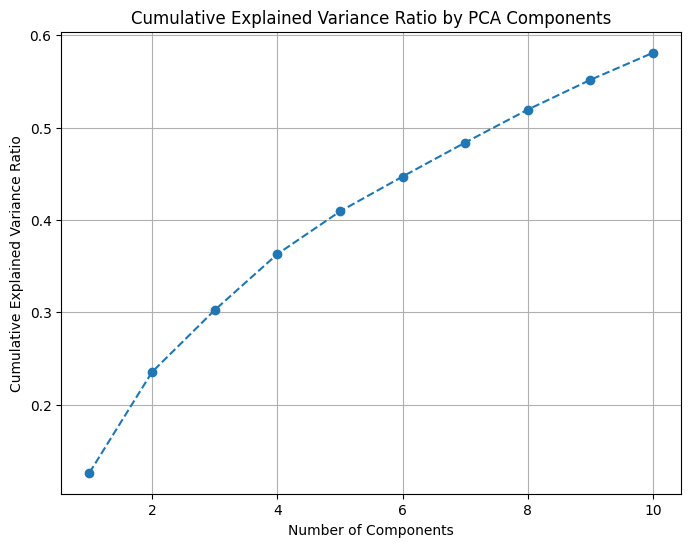

In [17]:
import numpy as np

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratios
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot cumulative explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()


In [ ]:
pca.n_components_

10

In [ ]:
X_pca.shape

(1140000, 10)

In [ ]:
import numpy as np

principal_components = pca.components_
loadings_pc1 = principal_components[0]  # Loadings for PC1


# Get the indices of features sorted by their absolute loadings for PC1
sorted_indices_pc1 = np.argsort(np.abs(loadings_pc1))[::-1]

# Print the most influential features (columns) for PC1
print("Most Influential Features (Columns) for PC1:")
for idx in sorted_indices_pc1:
    print(f"Column {idx}: {X.columns[idx]} (Loading: {loadings_pc1[idx]:.4f})")


Most Influential Features (Columns) for PC1:
Column 18: LA_xacc (Loading: 0.2846)
Column 33: RL_xmag (Loading: 0.2789)
Column 36: LL_xacc (Loading: -0.2758)
Column 9: RA_xacc (Loading: 0.2715)
Column 27: RL_xacc (Loading: -0.2707)
Column 42: LL_xmag (Loading: 0.2695)
Column 34: RL_ymag (Loading: 0.2459)
Column 24: LA_xmag (Loading: -0.2378)
Column 15: RA_xmag (Loading: -0.2277)
Column 0: T_xacc (Loading: 0.2163)
Column 28: RL_yacc (Loading: -0.2135)
Column 43: LL_ymag (Loading: -0.2100)
Column 11: RA_zacc (Loading: -0.2045)
Column 37: LL_yacc (Loading: 0.2035)
Column 8: T_zmag (Loading: 0.1805)
Column 17: RA_zmag (Loading: 0.1744)
Column 6: T_xmag (Loading: -0.1736)
Column 20: LA_zacc (Loading: -0.1118)
Column 26: LA_zmag (Loading: 0.1065)
Column 7: T_ymag (Loading: -0.0888)
Column 44: LL_zmag (Loading: 0.0825)
Column 38: LL_zacc (Loading: -0.0683)
Column 19: LA_yacc (Loading: -0.0674)
Column 35: RL_zmag (Loading: -0.0648)
Column 2: T_zacc (Loading: -0.0636)
Column 10: RA_yacc (Loading

# **3. Model Implementation and Baseline Evaluation**

## **a. K-Nearest Neigbour (KNN)**

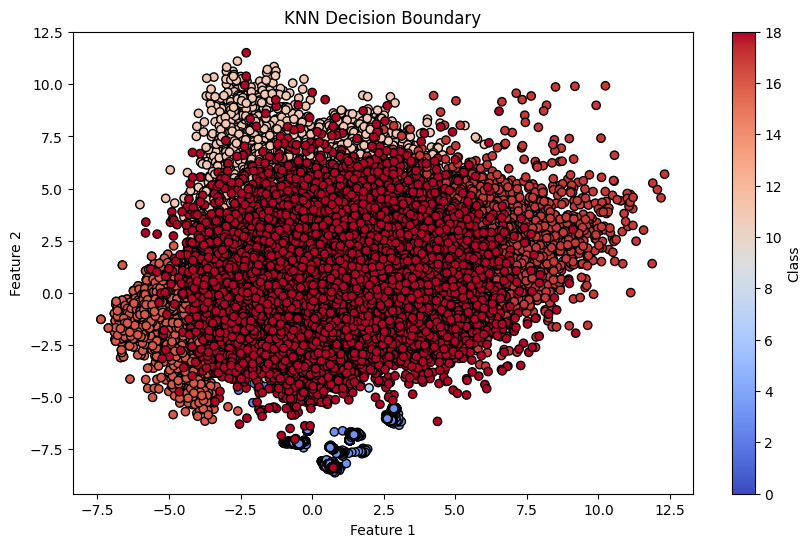

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming X contains the relevant subset of features for visualization
# For example, let's use the first two features for simplicity
#X = df.iloc[:, :2].values  # Select first two features for visualization
y = df.iloc[:, 46].values   # Assuming last column is the target (class)
X = X_pca

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Define the mesh grid range based on the selected features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


# Plot decision boundary and training data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the error rate
error_rate = 1 - accuracy

print(f'Accuracy: {accuracy}\nError Rate: {error_rate}')

Accuracy: 0.978328947368421
Error Rate: 0.02167105263157898


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11913
           1       1.00      1.00      1.00     11946
           2       1.00      1.00      1.00     12037
           3       1.00      1.00      1.00     12142
           4       0.91      1.00      0.95     12006
           5       0.97      0.93      0.95     11999
           6       0.99      1.00      1.00     12299
           7       0.96      0.97      0.96     11926
           8       0.97      1.00      0.99     11960
           9       0.97      0.99      0.98     11999
          10       0.98      0.98      0.98     12078
          11       0.97      0.99      0.98     11973
          12       0.97      0.99      0.98     12081
          13       0.98      1.00      0.99     11950
          14       1.00      1.00      1.00     11941
          15       1.00      1.00      1.00     11962
          16       1.00      1.00      1.00     11889
          17       0.95    

## **b. Decision Tree**

In [ ]:
# Extract features (sensor data) and target labels (activity)
X = df.iloc[:, :45]  # Features: sensor data columns
y = df.iloc[:, 46]    # Target: activity labels

# Encode categorical target labels (activities) into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training data
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred = tree_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11913
           1       1.00      1.00      1.00     11946
           2       1.00      1.00      1.00     12037
           3       1.00      1.00      1.00     12142
           4       0.94      0.90      0.92     12006
           5       0.88      0.94      0.91     11999
           6       0.97      0.98      0.97     12299
           7       0.87      0.88      0.87     11926
           8       0.94      0.95      0.95     11960
           9       0.91      0.91      0.91     11999
          10       0.91      0.92      0.92     12078
          11       0.94      0.93      0.94     11973
          12       0.93      0.93      0.93     12081
          13       0.95      0.96      0.96     11950
          14       0.99      0.99      0.99     11941
          15       0.99      0.99      0.99     11962
          16       1.00      1.00      1.00     11889
          17

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11913
           1       1.00      1.00      1.00     11946
           2       1.00      1.00      1.00     12037
           3       1.00      1.00      1.00     12142
           4       0.94      0.90      0.92     12006
           5       0.88      0.94      0.91     11999
           6       0.97      0.98      0.97     12299
           7       0.87      0.88      0.87     11926
           8       0.94      0.95      0.95     11960
           9       0.91      0.91      0.91     11999
          10       0.91      0.92      0.92     12078
          11       0.94      0.93      0.94     11973
          12       0.93      0.93      0.93     12081
          13       0.95      0.96      0.96     11950
          14       0.99      0.99      0.99     11941
          15       0.99      0.99      0.99     11962
          16       1.00      1.00      1.00     11889
          17       0.88    

# **c. Feature Importance by Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)
# Fit and transform the feature data (X) using the scaler
X_scaled = scaler.fit_transform(X)
X = X_scaled
# Now X_scaled contains the normalized feature data


Selected Features:
T_xacc: 570.0564881735803
T_yacc: 880.9384163886938
T_zacc: 288.00579023760633
T_xgyro: 0.12469358143454952
T_ygyro: 0.07208161842678876
T_zgyro: 0.03493101368250438
T_xmag: 42840.95331625143
T_ymag: 31856.06838273148
T_zmag: 54419.00450081513
RA_xacc: 2129.2329281079674
RA_yacc: 722.3701369450863
RA_zacc: 637.1194984591014
RA_xgyro: 0.7530082956997294
RA_ygyro: 14.472905489833021
RA_zgyro: 1.2861910719804315
RA_xmag: 23768.213271655004
RA_ymag: 5619.352305906953
RA_zmag: 7180.972608000918
LA_xacc: 2176.5578467216774
LA_yacc: 682.4214118135324
LA_zacc: 1390.6181853065677
LA_xgyro: 1.3557225432038282
LA_ygyro: 10.743870817411356
LA_zgyro: 4.725085043646873
LA_xmag: 12961.474741933884
LA_ymag: 14714.299849031375
LA_zmag: 4381.167862712437
RL_xacc: 1132.8210874614133
RL_yacc: 906.4904551357007
RL_zacc: 581.82753574714
RL_xgyro: 1.1347052702182954
RL_ygyro: 14.439035869074766
RL_zgyro: 0.35191537072649504
RL_xmag: 37610.53077989604
RL_ymag: 55619.952734321574
LL_yacc: 56

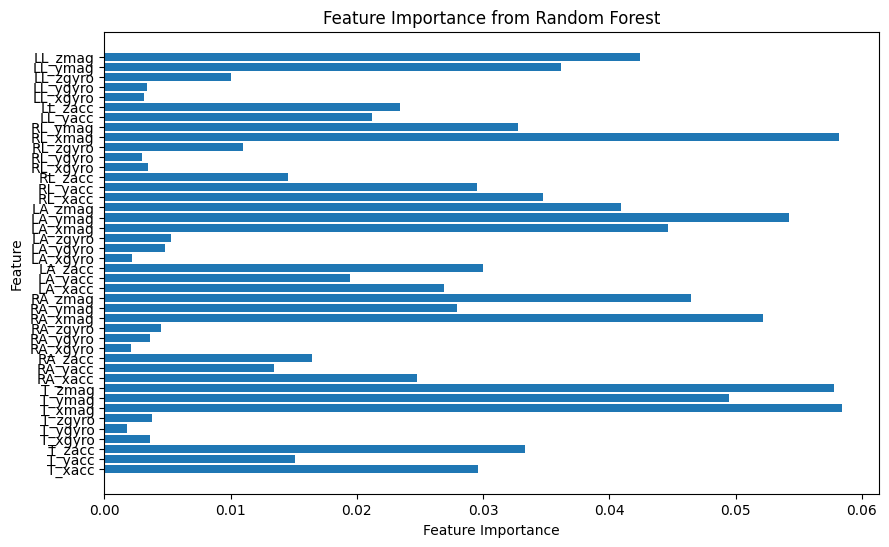

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features (X_scaled) back to DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Univariate feature selection using chi-square test for categorical features
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled_df, y)

# Get selected features and corresponding scores
selected_features = X_scaled_df.columns[selector.get_support()]
feature_scores = selector.scores_

# Print selected features and their scores
print("Selected Features:")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score}")

# Plot feature importance using Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_scaled_df, y)

plt.figure(figsize=(10, 6))
plt.barh(X_scaled_df.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

## **c. Random Forest**

In [19]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
import graphviz

In [20]:
X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5, random_state=0)

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [24]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))


0.3521520467836257

In [26]:
report = classification_report(y_test, model.predict(X_test))
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      0.00      0.00     17850
           2       0.00      0.00      0.00     17911
           3       1.00      0.99      1.00     18019
           4       1.00      1.00      1.00     17915
           5       0.00      0.00      0.00     18010
           6       0.00      0.00      0.00     17948
           7       0.00      0.00      0.00     17989
           8       0.75      0.00      0.00     18197
           9       0.91      0.00      0.00     18064
          10       0.29      0.83      0.43     17990
          11       0.00      0.00      0.00     18028
          12       0.73      0.08      0.14     18008
          13       0.17      0.93      0.28     17861
          14       0.90      0.00      0.01     17971
          15       0.16      0.99      0.27     18171
          16       0.82      0.95      0.88     18091
          17       1.00      0.82      0.90     17990
          18       0.73    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. Hyperparameter Tunning

In [ ]:
X = df.drop(['T_xgyro','T_zgyro', 'T_ygyro','RA_xgyro','LA_xgyro','RL_xgyro', 'RL_ygyro', 'RL_ygyro', 'LL_xgyro', 'LL_ygyro', 'RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5, random_state=0)

model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.35214912280701754

<Axes: xlabel='depth', ylabel='Accuracy'>

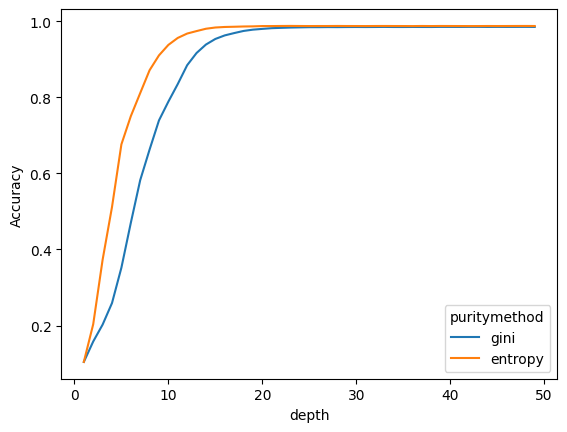

In [ ]:
ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'Accuracy'])

for i in np.arange(1, 50):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, accuracy_score(y_test, pred)]
    ind+=1
sns.lineplot(x = 'depth', y = 'Accuracy', hue='puritymethod', data = df_results)

LOGISTIC REGRESSION

In [21]:
# Assuming you've loaded your dataset into a DataFrame called 'df'
# X represents your features (input variables), and y represents your target (labels)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.87      0.84     11913
           2       0.44      0.41      0.43     11946
           3       0.97      1.00      0.98     12037
           4       1.00      1.00      1.00     12142
           5       0.67      0.89      0.76     12006
           6       0.60      0.85      0.70     11999
           7       0.53      0.42      0.47     12299
           8       0.50      0.41      0.45     11926
           9       0.41      0.49      0.44     11960
          10       0.60      0.63      0.61     11999
          11       0.42      0.37      0.40     12078
          12       0.59      0.61      0.60     11973
          13       0.80      0.82      0.81     12081
          14       0.77      0.93      0.84     11950
          15       0.94      0.91      0.92     11941
          16       0.96      0.96      0.96     11962
          17       0.98      0.97      0.98     11889
    

In [22]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_probas)
# generated by your logistic regression model

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = metrics.roc_curve(y_true, y_probas)

# Calculate the AUC (Area Under the Curve)
auc = metrics.roc_auc_score(y_true, y_probas)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {auc:.2f}")



NameError: name 'y_true' is not defined

NameError: name 'fpr_dt' is not defined

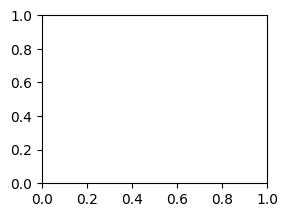

In [23]:
# Plot ROC curve for Decision Tree Classifier
plt.subplot(2, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


X = df.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)  # Features (sensor readings)
y = df['Activity']  # Target variable (activity)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])

# Parameters for GridSearchCV
param_grid = {
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # 'liblinear' works well with both l1 and l2
}

# Scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_score': make_scorer(f1_score, average='macro')}

# Create Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Collecting all the results in a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Selecting desired columns
#columns_to_display = ['param_logreg__C', 'param_logreg__penalty', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']

# Display the results
results[[ 'param_logreg__penalty', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']]

NameError: name 'df' is not defined

In [ ]:
!pip install dask

In [ ]:
!pip install dask_ml

In [7]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from dask_ml.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Assuming `df` is your pandas DataFrame
ddf = dd.from_pandas(df, npartitions=10)

# Selecting features and target variable from Dask DataFrame
X = ddf.drop(['RL_zmag', 'LL_xacc', 'LL_xmag', 'Subject', 'Activity'], axis=1)
y = ddf['Activity']  # Target variable (activity)

# Splitting the data into training and testing sets using Dask
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Manually add an intercept column to X_train and X_test
X_train['intercept'] = 1
X_test['intercept'] = 1

# Create a scikit-learn compatible pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])

# Parameters for GridSearchCV
param_grid = {
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # 'liblinear' works well with both l1 and l2
}

# Scoring metrics (converted to scorers using make_scorer)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Create GridSearchCV instance with Dask-ML
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit GridSearchCV to the training data
with dask.config.set(scheduler='threads'):  # Use threads or distributed scheduler
    grid_search.fit(X_train.compute(), y_train.compute())

# Collecting all the results in a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Selecting desired columns for display
columns_to_display = ['param_logreg__penalty', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']

# Display the results
results[columns_to_display]


NameError: name 'df' is not defined